# DSA3101 Project

## Specifications of Approach

### Work Flow
- Take pdf in and convert into image 
- Do object detection 
- Sort contour 
- Clean & Select most informative boxes 
- Line detection (segregate the line) 
- Character segmentation and exponential detection 
- Optical character recognition (including mathematical symbols) 
- Look for brackets encapsulating several lines ie for matrix 

### Overall References
- [Computer Vision - Auto grading Handwritten Mathematical Answersheets](https://towardsdatascience.com/computer-vision-auto-grading-handwritten-mathematical-answersheets-8974744f72dd)

### Useful Links for Serving our Code
- [Converting PDF into images using python on AWS Lambda.](https://mohammad-imran.medium.com/converting-pdf-into-images-using-python-on-aws-lambda-8f34777af212)

## 1) Take in PDF & Convert into Image

If you are using Anaconda like me:
[CONDA CHEAT SHEET](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwiL1umVjMT6AhWHELcAHR9YC7sQFnoECBAQAQ&url=https%3A%2F%2Fdocs.conda.io%2Fprojects%2Fconda%2Fen%2F4.6.0%2F_downloads%2F52a95608c49671267e40c689e0bc00ca%2Fconda-cheatsheet.pdf&usg=AOvVaw3uUYEqas7NMuAmCCWAx_yl)
- Use Anaconda Navigator to create new virtual environment
- `conda env list` in terminal to list all environment available
- `activate <env name>`
- `env list` to confirm environment is activated

Install dependencies:
- `pip install pykernel`
- `pip install pdf2image`
- Download [poppler](https://github.com/oschwartz10612/poppler-windows/releases/) and unzip it as /Download/poppler-XXX
- `pip install matplotlib`

In [1]:
# import packages
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
from pdf2image.exceptions import (PDFInfoNotInstalledError, PDFPageCountError, PDFSyntaxError)

In [2]:
# read in and convert pdf to image
sample_filepath = "C:\\Users\\20jam\\Documents\\always-in-progress\\DSA3101 Data Science in Practice\\project - personal attempts\\original-data\\Tutorial 01\\ST2131_Tut1_T05_done.pdf"
pages = convert_from_path(sample_filepath, poppler_path=r'C:\Users\20jam\Downloads\poppler-22.04.0\Library\bin')


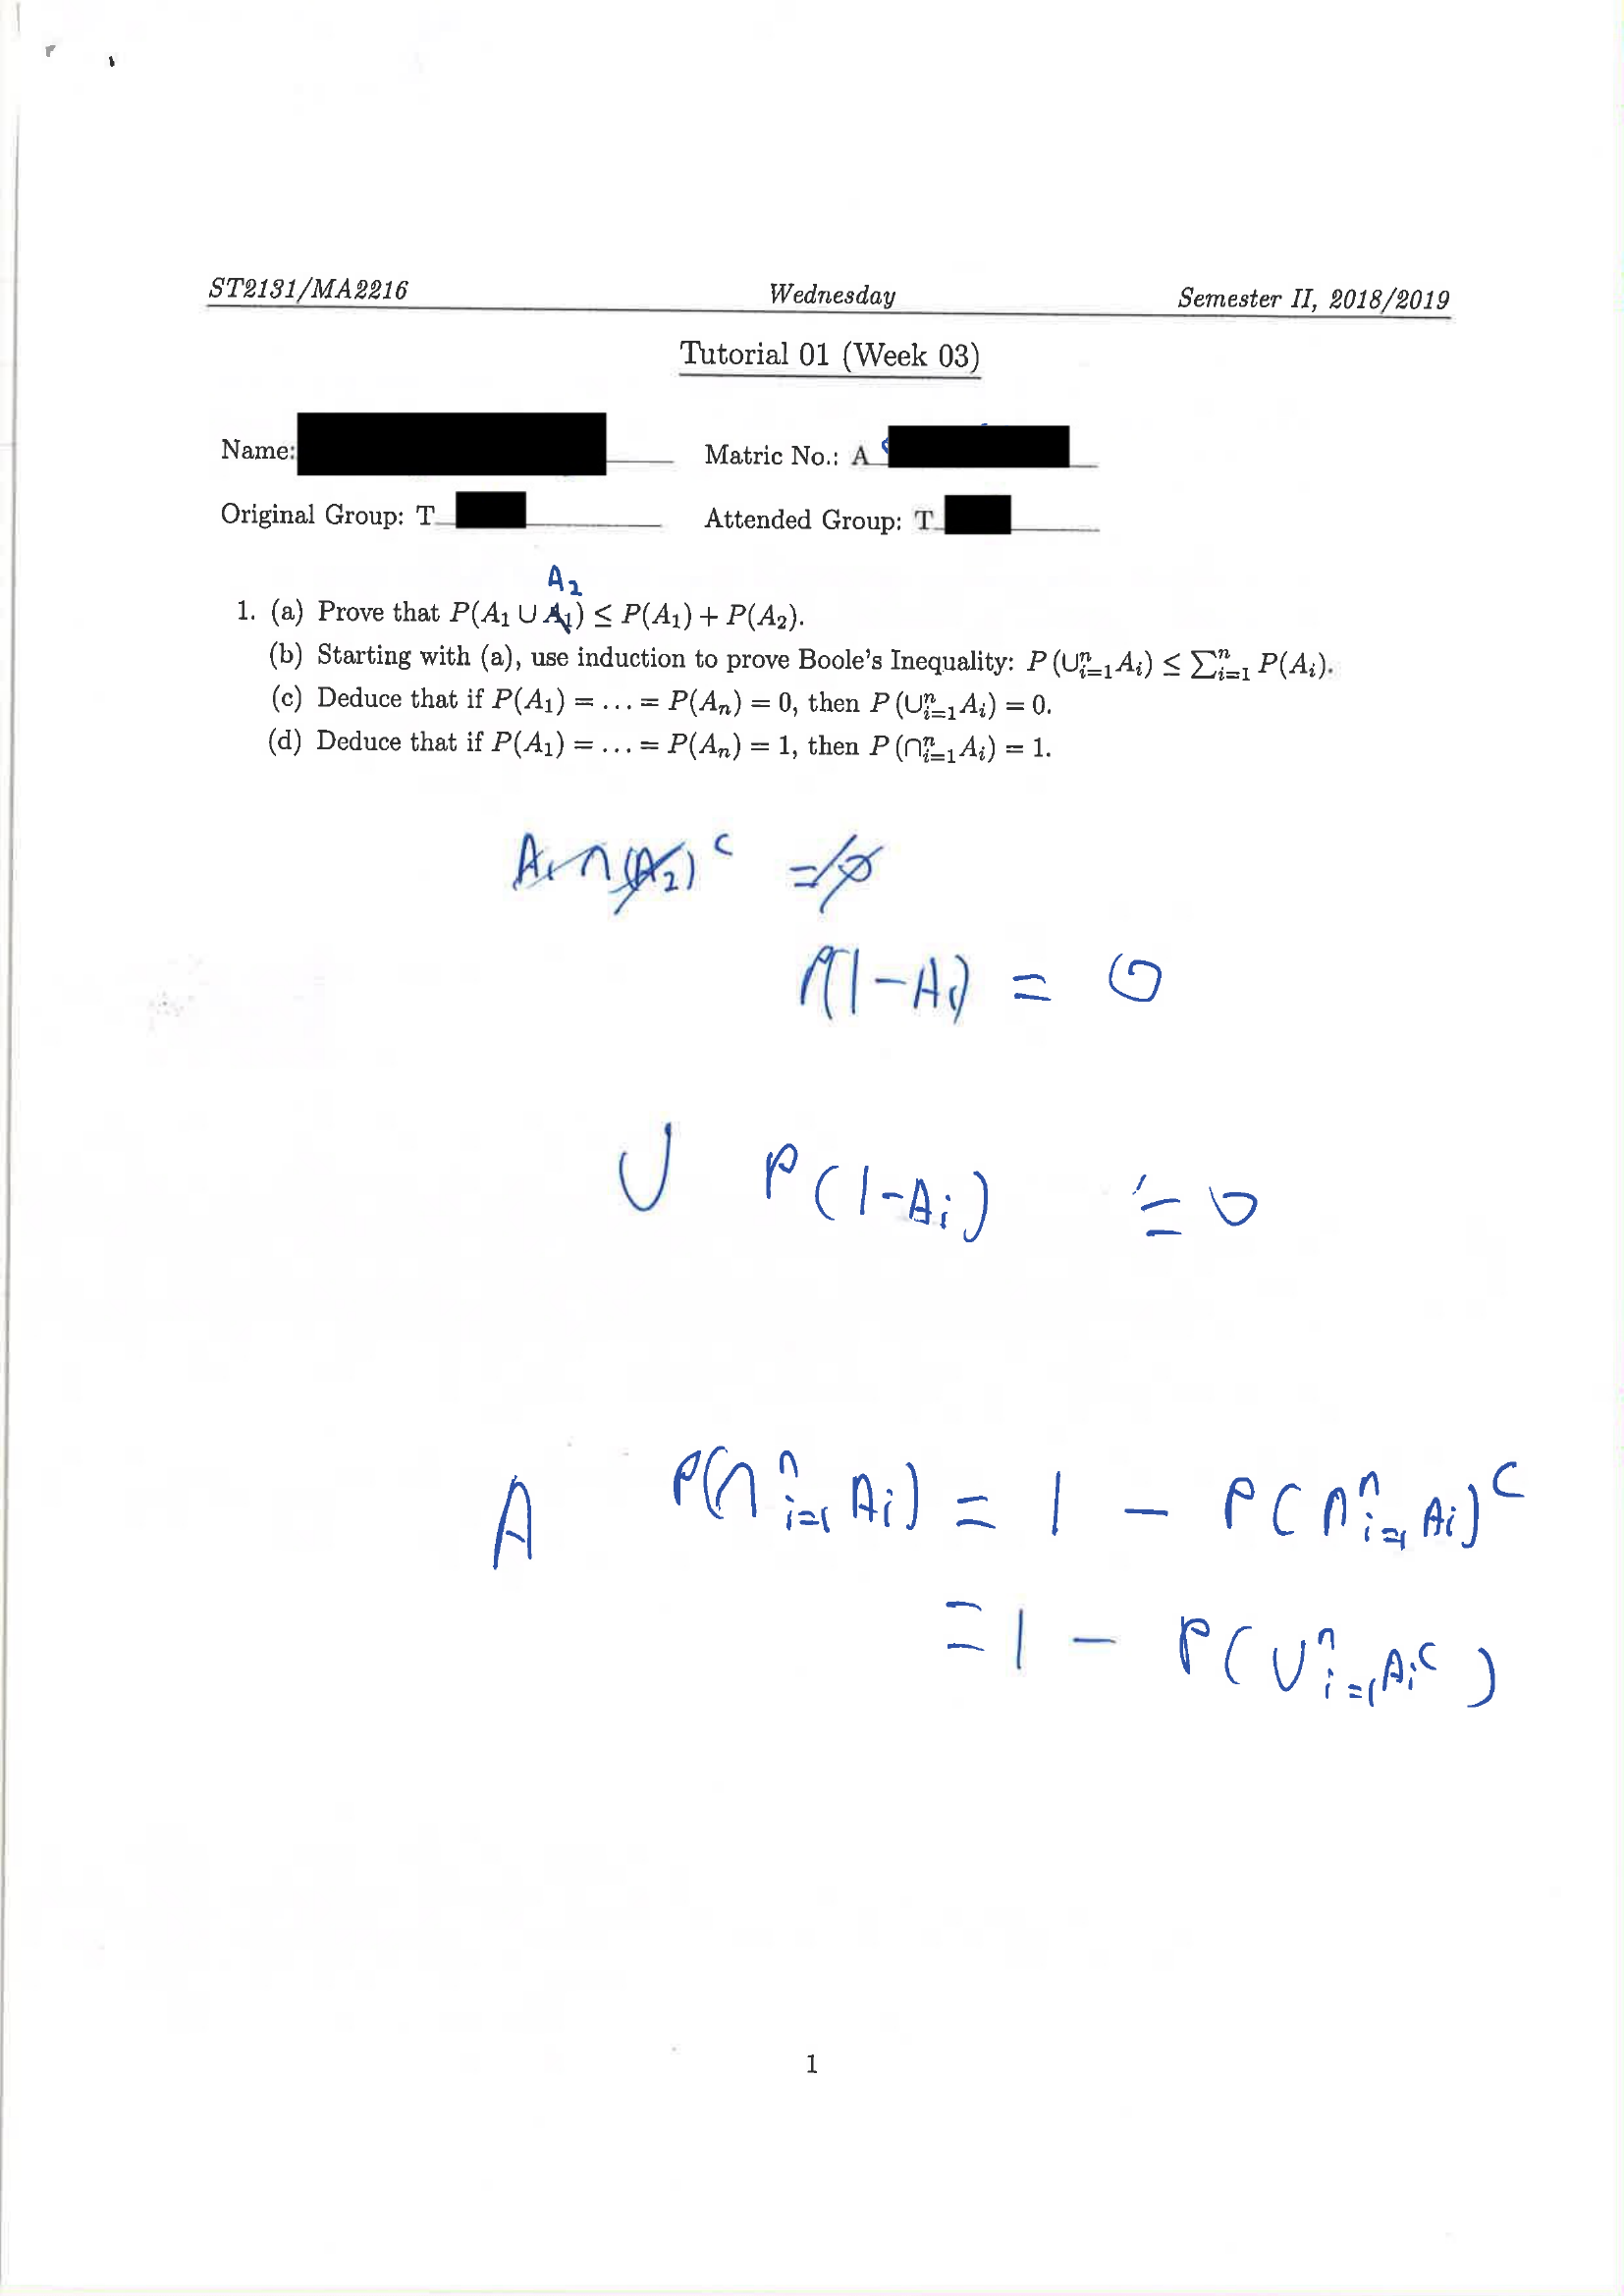

In [3]:
# visualize page 0
pages[0]

In [6]:
# save pages
for i in range(len(pages)):
    pages[i].save('modified-data\page'+ str(i) +'.jpg', 'JPEG')

### Section Specific References
- [PDF Parsing](https://www.ismailmebsout.com/pdfs-parsing/)
- [Convert PDF to Image using Python](https://www.geeksforgeeks.org/convert-pdf-to-image-using-python/)
- [Poppler in path for pdf2image](https://stackoverflow.com/questions/53481088/poppler-in-path-for-pdf2image)
- [Unable to get page count. Is poppler installed in PATH?](https://github.com/Belval/pdf2image/issues/142)

# Archived

## 2A) OCR with Tesseract, OpenCV and Python

- Installation Guide: https://pythonforundergradengineers.com/how-to-install-pytesseract.html
- Implementation Guide: https://nanonets.com/blog/ocr-with-tesseract/#training-tesseract-on-custom-data

In [8]:
# basic
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Users\20jam\anaconda3\envs\dsa3101-local\Library\bin\tesseract.exe'
path = "C:\\Users\\20jam\\Documents\\always-in-progress\\DSA3101 Data Science in Practice\\project - personal attempts\\2. modified-data\\page45.jpg"
pic = Image.open(path)
print(pic.show())
text_from_image = pytesseract.image_to_string(pic, lang = "eng+equ", config = "--psm 11") # psm for sparse contents
print(text_from_image)

None
ST2181/MA2216

Wednesday

Semester II, 2018/2019

2. The chess clubs of two schools consist of, respectively, 8 and 9 players. Four members from each club

are randomly chosen to participate in a contest between the two schools, The chosen players from

one team are then randomly paired with those from the other team, and each pairing plays a game of

chess, Suppose that Rebecca and her sister Elise are on the chess clubs at different schools. What is

the probability that

(a) Rebecca and Elise will be paired?

(b) Rebecca and Elise will be chosen to represent their schools but will not play each other?

(c) either Rebecca or Elise (but not both) will be chosen to represent their school?

4

as

at

X—y

_

4

\%

4

3

—

|

b)

_

xty

ES

s

q

4

6

+ X=

e

c) PCR chosen

net ED = 3

——

{=

7

“i

f

(anther not beth)

pP



In [9]:
# visualize bounding boxes
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread(path)
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


### Research for Object Detection based Handwriting Localization

### Section Specific Resources
- [Building an Object Detector in TensorFlow using bounding-box regression](https://medium.com/nerd-for-tech/building-an-object-detector-in-tensorflow-using-bounding-box-regression-2bc13992973f)
- [Object detection: Bounding box regression with Keras, TensorFlow, and Deep Learning](https://pyimagesearch.com/2020/10/05/object-detection-bounding-box-regression-with-keras-tensorflow-and-deep-learning/)
- [Installing VoTT](https://pyimagesearch.com/2020/10/05/object-detection-bounding-box-regression-with-keras-tensorflow-and-deep-learning/)
- [Using VoTT](https://www.youtube.com/watch?v=uDWgWJ5Gpwc)

### Related Resources
- [NO LONGER SUPPORTED - CatalystCode - Handwritting](https://github.com/CatalystCode/Handwriting)
- [dkurman - handwriting_recognition](https://github.com/dkurman/handwriting_recognition/blob/develop/src/text_body_detection/notebooks/MaskRCNN.ipynb)
- [IDEA-Research - detrex](https://github.com/IDEA-Research/detrex)
- [Detect handwriting in images](https://cloud.google.com/vision/docs/handwriting#vision-document-text-detection-python)